In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.model_selection import train_test_split
import wrangle_g as wr

In [2]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-notebook')

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('lang_data_prepped.csv',index_col=False)

In [5]:
df.head()

,Unnamed: 0,repo,language,readme_contents,stopped
0,0,ujjwalkarn/DataScienceR,R,# R Data Science Tutorials\n- This repo contai...,data science tutorials repo contain curated li...
1,1,IndrajeetPatil/ggstatsplot,R,---\noutput: github_document\n---\n\n <!-- RE...,output githubdocument readmemd generate readme...
2,2,easystats/easystats,R,"---\noutput: github_document\n---\n\n```{r, wa...",output githubdocument warningfalse messagefals...
3,3,seandavi/sars2pack,R,---\noutput: \n - rmarkdown::github_document\...,output rmarkdowngithubdocument rmarkdownhtmldo...
4,4,markvanderloo/lumberjack,R,## Track changes in data\n[![Build Status](htt...,track change data build statushttpstravisciorg...


In [6]:
df.iloc[10,3]

"# Statistical-Learning-Techniques\n\nThis is a Statistical Learning repository which will consist of various Learning algorithms and their implementation in R \nand their in depth interpretation. Below are the links to the implementation and their in-depth explanation of the learning algorithms in R. All the documents below contain the under-lying mathematical concepts explained with respect to a simple case study in R.\n\n\n### Topics Covered :\n\n1) Supervised Learning\n\n2) Model Selection techniques - AIC, BIC, Mallow's Cp ,  Adjusted R-squared ,  Cross validation error.\n\n3) Shrinkage Methods and Regularization techniques - Ridge Regression , LASSO, L1 norm, L2 norm.\n\n4) Non-linear Regression and parametric models\n\n5) Non-parametric model - K-nearest neighbor algorithm\n\n6) Tree based Modelling - Decision Trees\n\n7) Bayesian Modelling technique : Naive Bayes algorithm.\n\n8) Ensemble learning - Random Forests, Gradient Boosting , Bagging.\n\n9) Re-sampling methods and Cros

In [7]:
train, validate, test = wr.final_wrangle(df)

In [8]:
train.shape[0],validate.shape[0],test.shape[0]

(162, 70, 59)

In [9]:
train

,Unnamed: 0,repo,language,readme_contents,stopped
117,117,storieswithsiva/US-Job-Market-Analysis,R,# US Job Analysis in R\n[![Makes people smile]...,us job analysis make people smilehttpsfortheba...
8,8,adityashrm21/Bike-Sharing-Demand-Kaggle,R,# Bike-Sharing-Demand---Kaggle\n\nSolution to ...,bikesharingdemandkaggle solution kaggle knowle...
63,63,Sarah-Hesham-2022/Bio-Statistics-R-Coding-On-D...,R,# Bio-Statistics-R-Coding-On-Datasets-Analysis...,biostatisticsrcodingondatasetsanalysisandplott...
268,268,Tech-Matt/game_of_life,Python,# Game of Life\n\n## Premise\nThis is the firs...,game life premise first readme im write projec...
105,105,vincenzorusso3/tesi-triennale,R,# PPMI Research\nThe main goal is to create a ...,ppmi research main goal create system order cl...
...,...,...,...,...,...
225,225,VivanVatsa/Data-Science-Salary-Estimator,Python,# Data-Science-Salary-Estimator\n>> `BEST WITH...,datasciencesalaryestimator best lightmode fork...
16,16,thierrygosselin/assigner,R,---\noutput: github_document\n---\n\n\n# assig...,output githubdocument assigner hrefhttpthierry...
28,28,stasvlasov/nstandr,R,"# nstandr <img src=""img/logo.png"" align=""right...",nstandr img srcimglogopng alignright alt width...
33,33,alibalapour/CovidPlot19,R,---\noutput: github_document\nalways_allow_htm...,output githubdocument alwaysallowhtml true rea...


## df's and _words list

In [10]:
r_df = train[train.language=='R']
python_df = train[train.language=='Python']

In [11]:
r_words = ' '.join(r_df['stopped']).split()

In [12]:
len(r_words)

13052

In [13]:
python_words = ' '.join(python_df['stopped']).split()

In [14]:
len(python_words)

29005

In [15]:
all_words = ' '.join(train['stopped']).split()

In [16]:
len(all_words)

42057

In [17]:
len(all_words) - len(python_words)

13052

In [18]:
r_freq = pd.Series(r_words).value_counts()

In [19]:
r_freq.head(10)

data                260
use                 191
model               111
package             102
function            100
microelectronics     96
analysis             71
sgsthomson           71
project              63
plot                 58
dtype: int64

In [20]:
python_freq = pd.Series(python_words).value_counts()

In [21]:
python_freq.head(10)

data       498
use        348
str        170
file       168
run        168
model      166
install    164
return     146
import     121
learn      108
dtype: int64

In [22]:
all_freq = pd.Series(all_words).value_counts()

In [23]:
all_freq.head(10)

data        758
use         539
model       277
file        213
install     190
run         185
str         170
project     170
function    152
learn       150
dtype: int64

## freq's in a df

In [24]:
# concat all frequencies together into a dataframe
word_counts = pd.concat([r_freq, python_freq,all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['r','python','all']
word_counts.head()

,r,python,all
data,260,498,758
use,191,348,539
model,111,166,277
package,102,35,137
function,100,52,152


In [25]:
word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 100)]

,r,python,all
str,0,170,170


In [147]:
python_words = word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 10)].head(35)

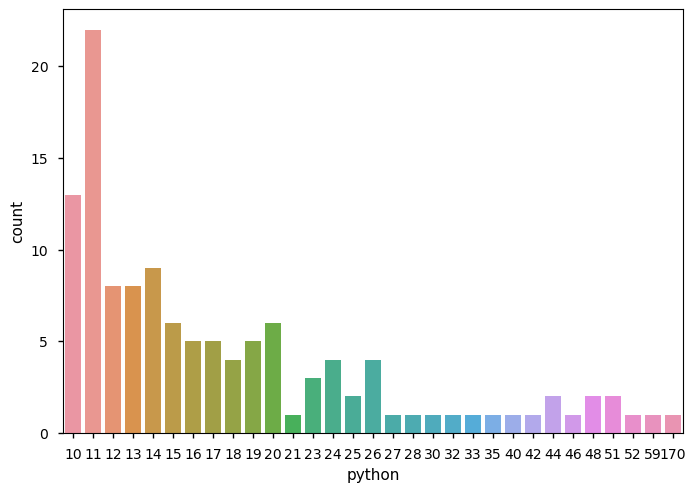

In [67]:
sns.countplot(data=python_words, x=python_words['python'])
plt.show()

In [27]:
word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 100)]

,r,python,all
str,0,170,170


In [146]:
r_words = word_counts[(word_counts['python'] == 0)&(word_counts['r'] >= 10)].head(35)

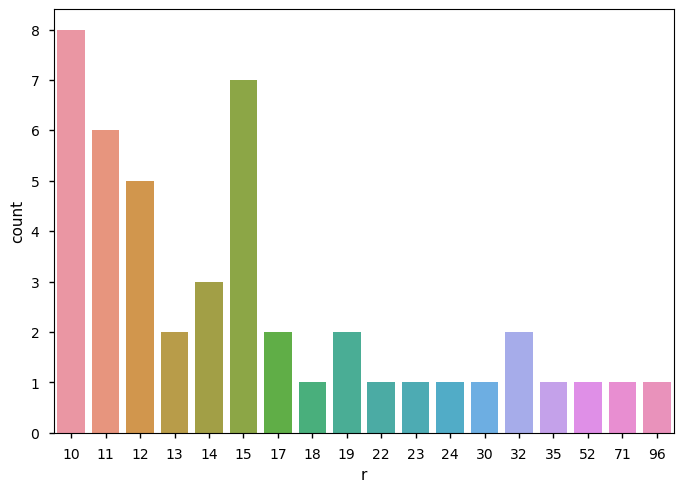

In [69]:
sns.countplot(data=r_words, x=r_words['r'])
plt.show()

In [204]:
total_py_count = word_counts[(word_counts['r'] == 0)&(word_counts['python'] >= 10)]
total_py_count = total_py_count.sort_values('python',ascending = False)
total_py_count.head()

,r,python,all
str,0,170,170
yyyymmdd,0,59,59
modin,0,52,52
div,0,51,51
pandas,0,51,51


In [130]:
len(total_py_count)

123

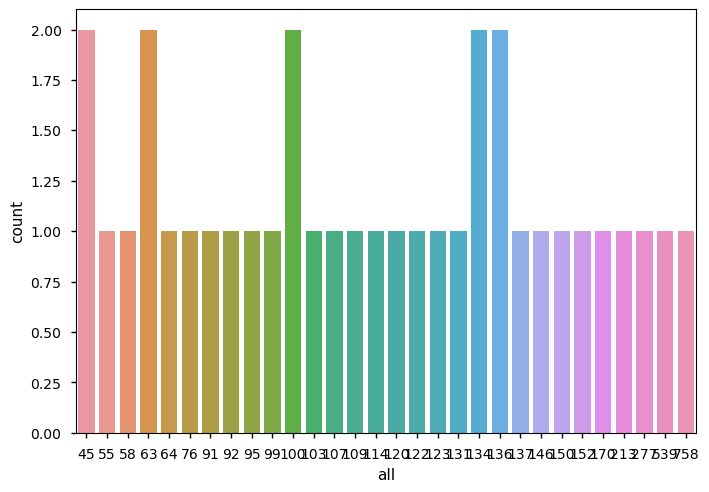

In [211]:
all_words = word_counts[(word_counts['all'] >= 1)&(word_counts['python'] >= 10)&(word_counts['r'] >= 10)].head(35)
sns.countplot(data=all_words, x=all_words['all'])
plt.show()

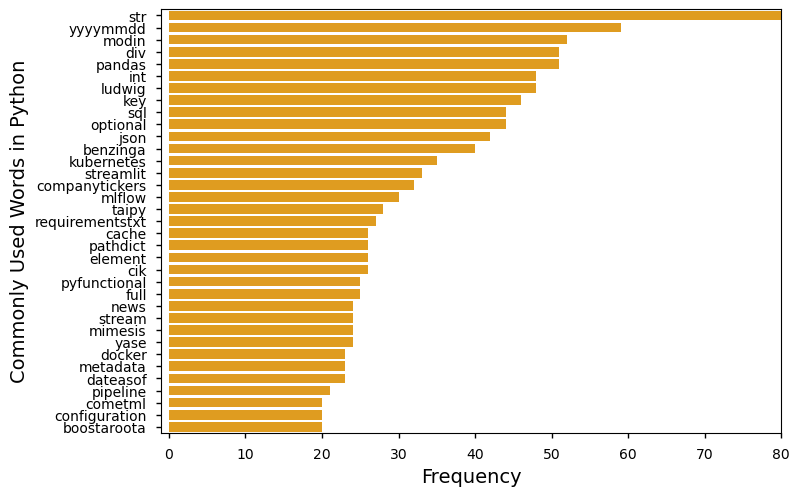

In [213]:
plt.figure()
plt.xlim(-1,80)
sns.barplot(data=total_py_count,x=python_words['python'],y=python_words.index,color='orange')
plt.ylabel('Commonly Used Words in Python',fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.show()

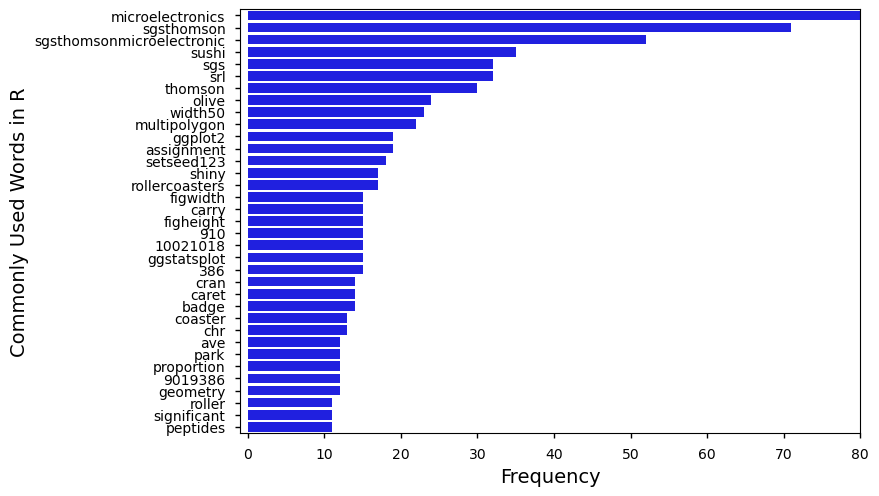

In [207]:
plt.figure()
plt.xlim(-1,80)
sns.barplot(data=total_py_count[cols_to_plot],x=r_words['r'],y=r_words.index,color='blue')
plt.ylabel('Commonly Used Words in R',fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.show()

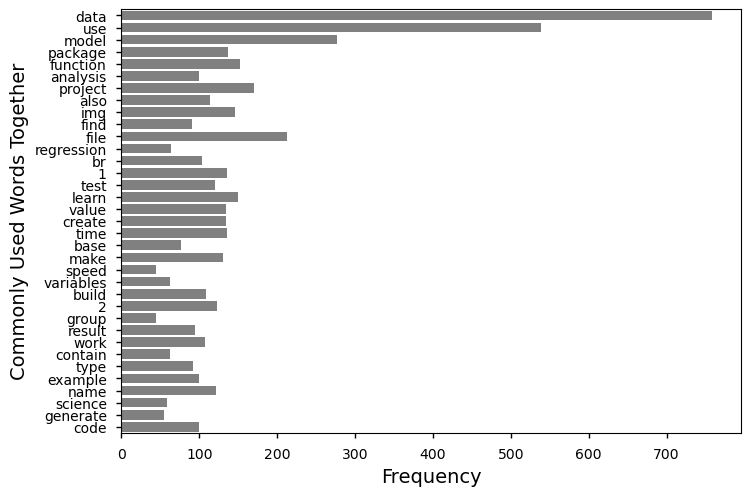

In [212]:
plt.figure()
#plt.xlim(-1,180)
sns.barplot(data=total_py_count[cols_to_plot],x=all_words['all'],y=all_words.index,color='gray')
plt.ylabel('Commonly Used Words Together',fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.show()